In [1]:
import imp
import os
import sys
from os.path import join
from pycog.utils import mkdir_p
import numpy as np

name = 'rdm_dense'

base = os.path.abspath(os.getcwd())
examplespath = join(base, 'examples')
modelspath = join(examplespath, 'models')
analysispath = join(examplespath, 'analysis')
workpath = join(base, name)
datapath = join(workpath, 'data')
figspath = join(workpath, 'figs')
trialspath = join(workpath, 'trials')

for path in [datapath, figspath, trialspath]:
    mkdir_p(path)


# Select which model file to use here.
modelfile = join(modelspath, name + '.py')
# Select the corresponding analysis script here.
runfile = join(analysispath, 'rdm.py')

# Set the data file name here
savefile = join(datapath, name + '.pkl')


In [2]:
############
# Training #
############

from pycog import Model
seed = 1001
model = Model(modelfile=modelfile)
# Only train the models
# Set to false if you're training a different model
recover = True 
model.train(savefile, seed=seed, recover=True)

=> settings
   | GPU:                       no
   | init seed:                 1001
   | distribution (Win):        uniform
   | distribution (Wrec):       gamma
   | distribution (Wout):       uniform
   | Nin/N/Nout:                2/100/2
   | Dale's law:                E/I = 80/20
   | initial spectral radius:   1.50
   | train recurrent bias:      no
   | train output bias:         no
   | train initial conditions:  yes
   | sparseness (Wrec):         p = 0.99, p_plastic = 0.99
   | sparseness (Wout):         p = 0.80, p_plastic = 0.80
   | E/I positivity function:   rectify
   | hidden activation:         rectify
   | output activation/loss:    linear/squared
   | mode:                      batch
   | output mask:               yes
   | sigma_in:                  0.01
   | sigma_rec:                 0.15
   | rectify inputs:            True
   | gradient minibatch size:   20
   | validation minibatch size: 1100
   | dt:                        20.0 ms
   | tau:                    

In [3]:
#############
# RNN setup #
#############

# Get the analysis and model files as modules.
r = imp.load_source('analysis', runfile)
m = imp.load_source('model', modelfile)

# Set all the parameters.

dt = 0.5 # Default value
dt_save = 20 # From all.py

action = 'trials'
num_trials = 50
args = [num_trials]
antagonist_level = 0

params = {
        'seed':       seed,
        'model':      m,
        'savefile':   savefile,
        'name':       name,
        'datapath':   datapath,
        'figspath':   figspath,
        'trialspath': trialspath,
        'dt':         dt,
        'dt_save':    dt_save,
        'ant_level':  antagonist_level
        }

In [4]:
###############
# Run the RNN #
###############

ant_levels = [0, .1, .2, .3, .4, .5, .6]
for ant_level in ant_levels:
    params['ant_level'] = ant_level
    r.do(action, args, params)

ACTION*:   trials
ARGS*:     [50]
[ pycog.rnn.RNN ] 11000 updates, best error = 0.19368601, spectral radius = 2.25614095
We are 0.00% complete
We are 18.18% complete
We are 36.36% complete
We are 54.55% complete
We are 72.73% complete
We are 90.91% complete

[ examples.analysis.rdm.run_trials ] Trials saved to C:\Users\James Collins\SoftwareDevelopment\pycog\rdm_dense\trials\rdm_dense_ant_level_0_trials.pkl (0.0 GB)
[ examples.analysis.rdm.psychometric_function ] 445/500 = 89.00% correct.
ACTION*:   trials
ARGS*:     [50]
[ pycog.rnn.RNN ] 11000 updates, best error = 0.19368601, spectral radius = 2.25614095
We are 0.00% complete
We are 18.18% complete
We are 36.36% complete
We are 54.55% complete
We are 72.73% complete
We are 90.91% complete

[ examples.analysis.rdm.run_trials ] Trials saved to C:\Users\James Collins\SoftwareDevelopment\pycog\rdm_dense\trials\rdm_dense_ant_level_0.1_trials.pkl (0.0 GB)
[ examples.analysis.rdm.psychometric_function ] 433/500 = 86.60% correct.
ACTION*:  

[ examples.analysis.rdm.psychometric_function ] 445/500 = 89.00% correct.
[ examples.analysis.rdm.psychometric_function ] 433/500 = 86.60% correct.
[ examples.analysis.rdm.psychometric_function ] 394/500 = 78.80% correct.


C:\Anaconda3\envs\RNN\lib\site-packages\scipy\optimize\minpack.py:715: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


[ examples.analysis.rdm.psychometric_function ] 352/500 = 70.40% correct.
[ examples.analysis.rdm.psychometric_function ] 324/500 = 64.80% correct.
[ examples.analysis.rdm.psychometric_function ] 311/500 = 62.20% correct.
[ examples.analysis.rdm.psychometric_function ] 253/500 = 50.60% correct.


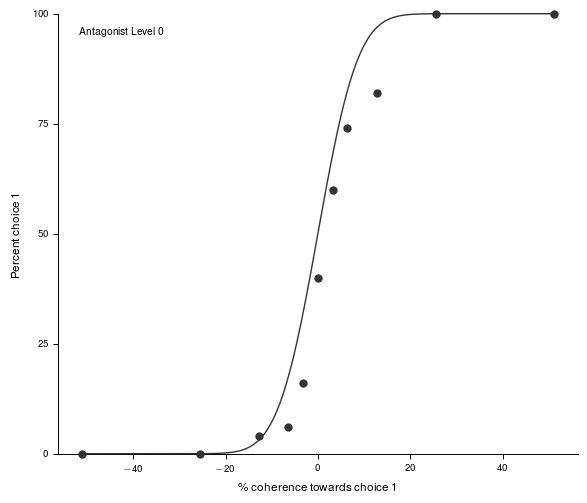

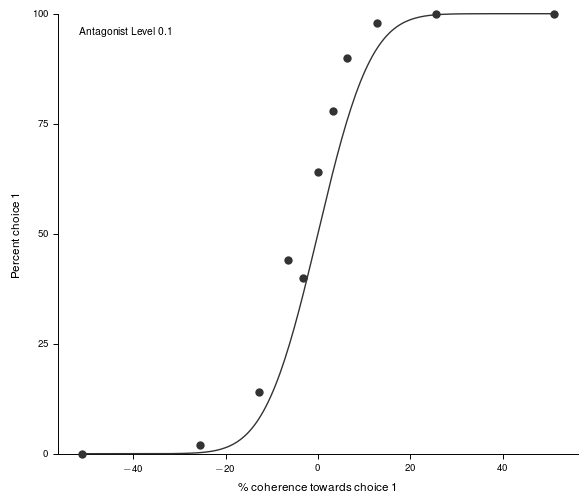

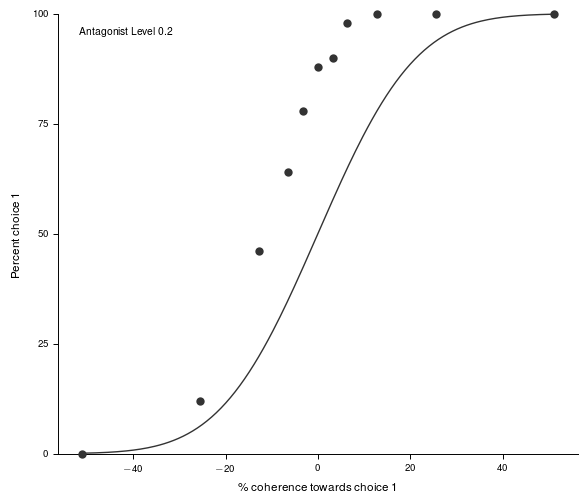

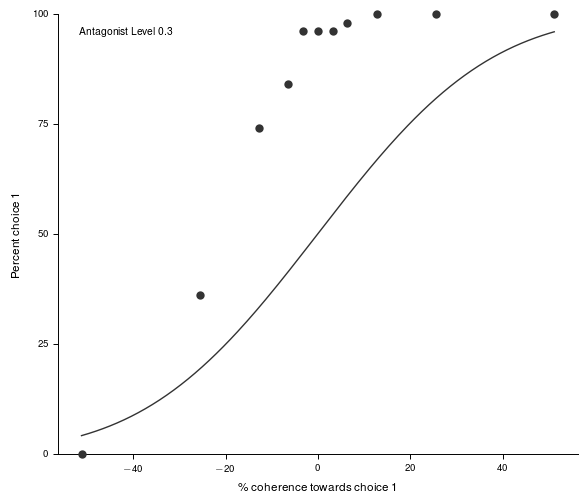

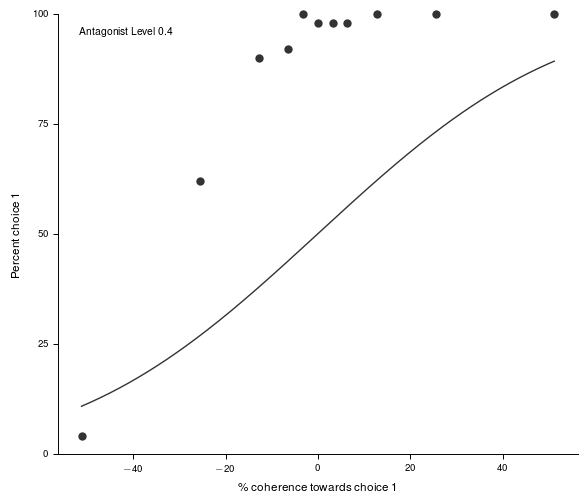

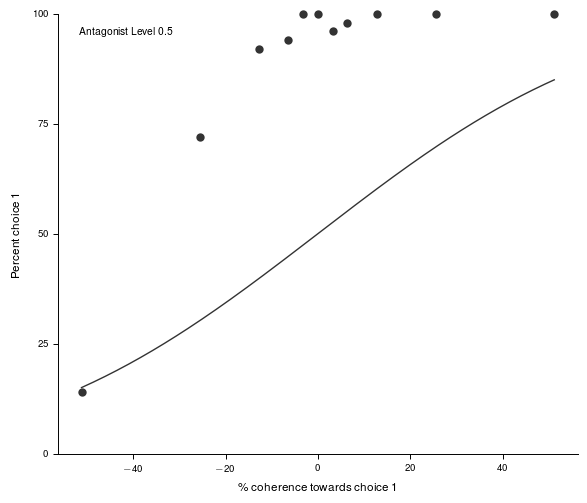

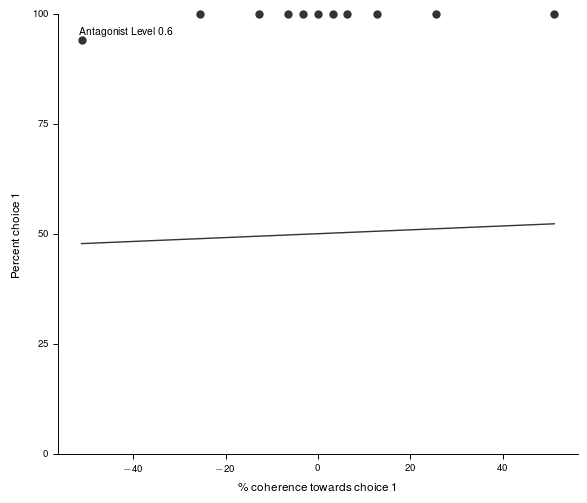

In [5]:
%matplotlib inline
from pycog.figtools import Figure

for ant_level in ant_levels:
    trialsfile = join(trialspath, name + '_ant_level_' + 
                      str(ant_level) + '_trials.pkl')
    fig = Figure()
    plot = fig.add()
    plot.xlabel(r'\% coherence towards choice 1')
    plot.ylabel(r'Percent choice 1')
    plot.text_upper_left('Antagonist Level {}'.format(str(ant_level)))
    r.psychometric_function(trialsfile, plot=plot)


In [ ]:
from pycog.rnn import RNN
for ant_level in ant_levels:
    rnn = RNN(params['savefile'], {'dt': params['dt']}, verbose=False)
    rnn.Wrec[np.where(rnn.Wrec<0)] *= (1-ant_level)
    rnn.plot_structure()    
    